# ✅ MVP – Reclamações de Beneficiários de Planos de Saúde (ANS)

# 🎯 Objetivo do Projeto
Este projeto tem como objetivo analisar a experiência dos consumidores de planos de saúde a partir das reclamações registradas na base pública da ANS (Agência Nacional de Saúde Suplementar), referente ao ano de 2024.

A partir da análise, busca-se identificar padrões de insatisfação, avaliar o comportamento das operadoras e levantar insights que possam auxiliar na melhoria do atendimento e dos produtos oferecidos.


# ❓ Perguntas que serão respondidas:

1. Quais operadoras mais recebem reclamações?
2. Quais os assuntos mais recorrentes nas reclamações?
3. Qual o perfil dos beneficiários que mais reclamam?
4. Quais estados concentram mais reclamações?
5. Há diferenças entre os meios de atendimento usados?
6. Qual a modalidade de operadora com mais reclamações?
7. Reclamações por época de contratação do plano
8. Existe diferença entre operadoras no status final das demandas?
9. Qual a cobertura mais reclamada?
10. Alguns procedimentos são mais reclamados?


*Observação:* A pergunta sobre tempo médio de resposta não pôde ser respondida com a base atual, pois não há coluna com data de encerramento da demanda.



# 🌐 Plataforma Utilizada
Embora o curso tenha foco em Databricks, este projeto foi desenvolvido na plataforma Google Colab, que também oferece um ambiente de desenvolvimento em nuvem gratuito e de fácil integração com bibliotecas de análise de dados em Python.



# 🔍 1. Busca pelos Dados
Fonte: Agência Nacional de Saúde Suplementar – ANS
🔗https://dados.gov.br/dados/conjuntos-dados/demandas-dos-consumidores--reclamacoes-de-beneficiarios

Conjunto escolhido: Reclamações de Beneficiários – 2024
Licença de uso: Uso público, conforme política de dados abertos da ANS.

### 🗂️ Catálogo de Dados

Abaixo está o catálogo completo com as variáveis utilizadas no projeto, incluindo tipo de dado, presença de valores nulos, exemplo de valor e descrição.

As informações de descrição foram extraídas diretamente do glossário oficial da ANS (Agência Nacional de Saúde Suplementar), acessado via arquivo público em formato ODS.




In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Leitura da base de reclamações
df = pd.read_csv('reclamacoes_ans_2024.csv', sep=';', encoding='latin1')
df.columns = df.columns.str.strip().str.upper().str.replace(' ', '_')

# Gerar catálogo de dados
colunas = df.columns.tolist()
tipos = df.dtypes
nulos = df.isnull().sum()

catalogo_dados = pd.DataFrame({
    'Coluna': colunas,
    'Tipo': [tipos[col] for col in colunas],
    'Valores_Nulos': [nulos[col] for col in colunas],
    'Exemplo_de_Valor': [
        df[col].dropna().astype(str).unique()[0] if df[col].notna().any() else '---' for col in colunas
    ]
})

# Carregar o glossário do GitHub ou do .ods local
glossario_df = pd.read_excel('https://raw.githubusercontent.com/ThaysMolina/mvp-ans-reclamacoes/main/dados/dicionario_de_dados_demandas_de_consumidor%20(1).ods', engine='odf')

# Encontrar a linha onde começa a tabela
linha_inicio = glossario_df[glossario_df.iloc[:, 0].astype(str).str.contains("Nome do Campo", na=False)].index[0]

# Processar o glossário
tabela_glossario = glossario_df.iloc[linha_inicio + 1:].copy()
tabela_glossario.columns = ['COLUNA', 'TIPO_TAMANHO', 'DESCRICAO']
tabela_glossario = tabela_glossario.dropna(subset=['COLUNA'])
tabela_glossario['COLUNA'] = tabela_glossario['COLUNA'].str.strip().str.upper().str.replace(' ', '_')

# Juntar catálogo com glossário
catalogo_completo = catalogo_dados.merge(
    tabela_glossario,
    how='left',
    left_on='Coluna',
    right_on='COLUNA'
).drop(columns=['COLUNA'])

# Organizar e renomear colunas
catalogo_completo = catalogo_completo[[
    'Coluna', 'Tipo', 'TIPO_TAMANHO', 'Valores_Nulos', 'Exemplo_de_Valor', 'DESCRICAO'
]]
catalogo_completo.columns = [
    'Coluna', 'Tipo (Pandas)', 'Tipo Original', 'Valores Nulos', 'Exemplo de Valor', 'Descrição'
]

# Exibir resultado
catalogo_completo.head()


,Coluna,Tipo (Pandas),Tipo Original,Valores Nulos,Exemplo de Valor,Descrição
0,NUMERO_DEMANDA,float64,number,0,12882983.0,Identificador único da demanda
1,DATA_ATENDIMENTO,object,date,0,28/05/2024 00:00:00.000000,Data recebida na abertura da demanda
2,STATUS_DEMANDA,object,varchar2(255),0,Tentativa/Contato Consumidor Registrado,Situação atual em que a demanda se encontra (D...
3,ENCAMINHADO_OUVIDORIA,object,char(3),0,NÃO,Informação se houve encaminhamento para Ouvidoria
4,MEIO_ATENDIMENTO,object,varchar2(50),0,Telefone,Forma de contato do beneficiário com a Agência...


## 📥 Leitura dos dados (upload do arquivo CSV)

In [8]:
!pip install -q gdown
import gdown

# Link direto usando o ID do seu arquivo
file_id = '1OWJCt-uAe8nuNV9Wuepy3anVo2PulXyI'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'reclamacoes_ans_2024.csv', quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1OWJCt-uAe8nuNV9Wuepy3anVo2PulXyI
From (redirected): https://drive.google.com/uc?id=1OWJCt-uAe8nuNV9Wuepy3anVo2PulXyI&confirm=t&uuid=74a79845-3b49-40bd-b4c2-35db489677d8
To: /content/reclamacoes_ans_2024.csv
100%|██████████| 123M/123M [00:02<00:00, 50.3MB/s]


'reclamacoes_ans_2024.csv'

In [9]:

df = pd.read_csv('reclamacoes_ans_2024.csv', sep=';', encoding='latin1')
df.head()


,NUMERO_DEMANDA,DATA_ATENDIMENTO,STATUS_DEMANDA,ENCAMINHADO_OUVIDORIA,MEIO_ATENDIMENTO,ASSUNTO,REGISTRO_ANS,NOME_OPERADORA,MODALIDADE_OPERADORA,TIPO_PLANO_CONTRATADO,EPOCA_CONTRATACAO_PLANO,COBERTURAS_CONTRATADAS,DT_NASC_BENEFICIARIO,SEXO,UF_BENEFICIARIO,CD_MUN_BENEFICIARIO,NOME_PROCEDIMENTO,UF_ATENDIMENTO_BENEFICIARIO,NUMERO_PROCESSO
0,12882983.0,28/05/2024 00:00:00.000000,Tentativa/Contato Consumidor Registrado,NÃO,Telefone,Produto ou Plano >> Contratos e Regulamentos >...,701.0,UNIMED SEGUROS SAÚDE S/A,Seguradora Especializada em Saúde,NaN,-,NaN,10/09/1980 00:00:00.000000,F,SP,355030.0,NaN,NaN,NaN
1,12931973.0,24/06/2024 00:00:00.000000,Resposta do Interlocutor à solução do Conflito...,NÃO,Site,Produto ou Plano >> Cobertura >> Reembolso,348520.0,NOTRE DAME INTERMÉDICA MINAS GERAIS SAÚDE S.A.,Medicina de Grupo,Coletivo Empresarial,-,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,05/05/1993 00:00:00.000000,M,MG,310620.0,NaN,MG,NaN
2,12715340.0,24/02/2024 00:00:00.000000,Prazo de Resposta do Consumidor expirado,NÃO,Site,Produto ou Plano >> Contratos e Regulamentos >...,339679.0,UNIMED NACIONAL - COOPERATIVA CENTRAL,Cooperativa Médica,Coletivo Empresarial,-,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,08/12/1968 00:00:00.000000,F,DF,355030.0,NaN,NaN,NaN
3,13009947.0,06/08/2024 00:00:00.000000,Prazo de Resposta do Consumidor expirado,NÃO,Site,Produto ou Plano >> Cobertura >> Rol de Proced...,346659.0,CAIXA DE ASSISTÊNCIA DOS FUNCIONÁRIOS DO BANCO...,Autogestão,Individual ou Familiar,-,Segmentação pode variar,13/04/1988 00:00:00.000000,F,SP,530010.0,NaN,SP,NaN
4,12919184.0,17/06/2024 00:00:00.000000,Tentativa/Contato Consumidor Registrado,NÃO,Site,Produto ou Plano >> Cobertura >> Rol de Proced...,340782.0,CLINIPAM CLINICA PARANAENSE DE ASSISTENCIA MED...,Medicina de Grupo,Individual ou Familiar,-,Ambulatorial + Hospitalar c/ Obstetrícia + Odo...,22/05/1986 00:00:00.000000,F,PR,410690.0,NaN,PR,NaN


## 📊 Análise Descritiva dos Dados

In [10]:
# Dimensões do dataset
print(f'Nº de linhas: {df.shape[0]}')
print(f'Nº de colunas: {df.shape[1]}')

# Tipos de dados
df.dtypes

Nº de linhas: 297021
Nº de colunas: 19


,0
NUMERO_DEMANDA,float64
DATA_ATENDIMENTO,object
STATUS_DEMANDA,object
ENCAMINHADO_OUVIDORIA,object
MEIO_ATENDIMENTO,object
ASSUNTO,object
REGISTRO_ANS,float64
NOME_OPERADORA,object
MODALIDADE_OPERADORA,object
TIPO_PLANO_CONTRATADO,object


In [11]:
# Valores nulos por coluna
df.isnull().sum().sort_values(ascending=False)

,0
NUMERO_PROCESSO,296854
NOME_PROCEDIMENTO,292658
UF_ATENDIMENTO_BENEFICIARIO,63814
COBERTURAS_CONTRATADAS,5298
TIPO_PLANO_CONTRATADO,5298
UF_BENEFICIARIO,3430
SEXO,348
MODALIDADE_OPERADORA,73
NOME_OPERADORA,73
CD_MUN_BENEFICIARIO,73


In [12]:



#Exemplo de valores únicos
df['STATUS_DEMANDA'].value_counts()

,count
STATUS_DEMANDA,
Prazo de Resposta do Consumidor expirado,169591
Tentativa/Contato Consumidor Registrado,61773
Resposta do Interlocutor à solução do Conflito (NIP RN 343),24244
Alteração Manual,18815
Prazo de Resposta da Operadora expirado,10566
Demanda Finalizada,5040
Solicitação de reabertura da Demanda Inativa para Classificação.,3494
Demanda encaminhada para Tratamento Técnico,2113
Capturar para Abertura de Demanda Institucional,682


In [13]:
# Conversão de datas
df['DATA_ATENDIMENTO'] = pd.to_datetime(df['DATA_ATENDIMENTO'], errors='coerce')
df['MES_ANO'] = df['DATA_ATENDIMENTO'].dt.to_period('M')

<ipython-input-13-0db623900bbb>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DATA_ATENDIMENTO'] = pd.to_datetime(df['DATA_ATENDIMENTO'], errors='coerce')


## ✅ Análises Descritivas

# Analisar tendência temporal (sazonalidade) das reclamações:

<ipython-input-40-d8375c9fc2e0>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DATA_ATENDIMENTO'] = pd.to_datetime(df['DATA_ATENDIMENTO'], errors='coerce')


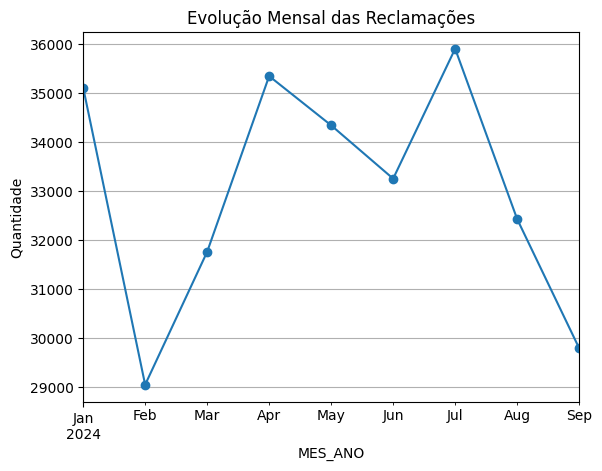

In [40]:
df['DATA_ATENDIMENTO'] = pd.to_datetime(df['DATA_ATENDIMENTO'], errors='coerce')
df['MES_ANO'] = df['DATA_ATENDIMENTO'].dt.to_period('M')
df.groupby('MES_ANO').size().plot(kind='line', marker='o')
plt.title('Evolução Mensal das Reclamações')
plt.ylabel('Quantidade')
plt.grid(True)
plt.show()


O gráfico acima mostra a variação no volume de reclamações mês a mês ao longo do ano de 2024. É possível observar:

📉 Fevereiro teve o menor volume de reclamações no período (provável influência do menor número de dias úteis e do Carnaval).

📈 Julho apresentou o maior pico de reclamações no ano.

🌀 Há uma oscilação considerável, com quedas e altas sucessivas entre os meses.

📊 A tendência geral parece estável, mas com variações sazonais significativas

# Gráfico de calor (heatmap) de reclamações por estado x tipo de plano

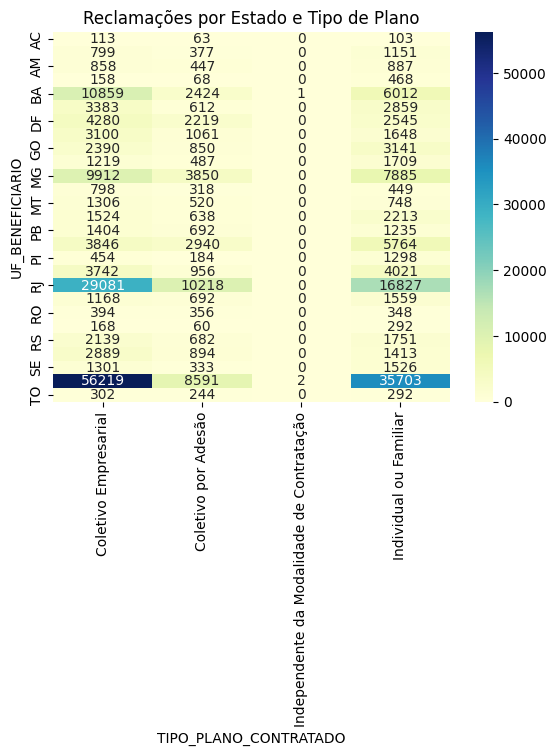

In [41]:
heatmap_data = pd.crosstab(df['UF_BENEFICIARIO'], df['TIPO_PLANO_CONTRATADO'])
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Reclamações por Estado e Tipo de Plano')
plt.show()


Os principais insights observados são:

Os estados de SP e RJ lideram o volume absoluto de reclamações, especialmente nos planos do tipo Coletivo Empresarial e Individual ou Familiar.

O tipo Coletivo por Adesão possui volume considerável em estados como SP, MG, DF e BA, indicando forte presença de entidades conveniadas nesses locais.

Estados com menor densidade populacional como AC, RR e AP apresentam volumes baixos, o que é esperado dado o número de beneficiários menor.

#  Respostas para as perguntas ❗

#  1️⃣ Quais operadoras mais recebem reclamações?

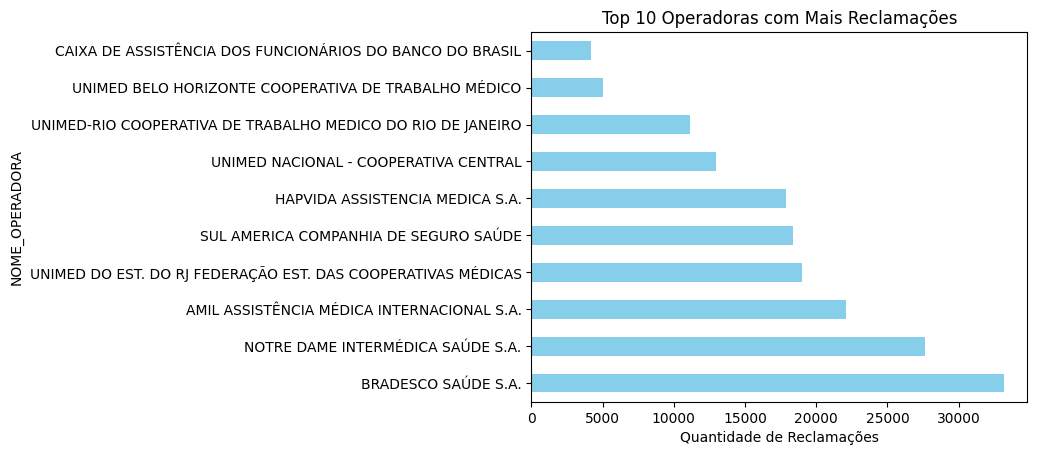

In [43]:
df['NOME_OPERADORA'].value_counts().head(10).sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Operadoras com Mais Reclamações')
plt.xlabel('Quantidade de Reclamações')
plt.gca().invert_yaxis()
plt.show()


O gráfico apresenta as 10 operadoras de planos de saúde com o maior número de reclamações registradas em 2024. Os dados evidenciam que:

Bradesco Saúde S.A. lidera o ranking, com mais de 33 mil registros.

Notre Dame Intermédica Saúde S.A. e Amil Assistência Médica Internacional S.A. ocupam, respectivamente, o segundo e terceiro lugares.

A presença de diferentes operadoras Unimed (federadas e cooperativas) mostra a grande capilaridade da rede e sua exposição a reclamações em diferentes regiões.

A Caixa de Assistência dos Funcionários do Banco do Brasil completa o Top 10, mesmo sendo voltada a um público restrito.

# 2️⃣ Quais os assuntos mais recorrentes nas reclamações?


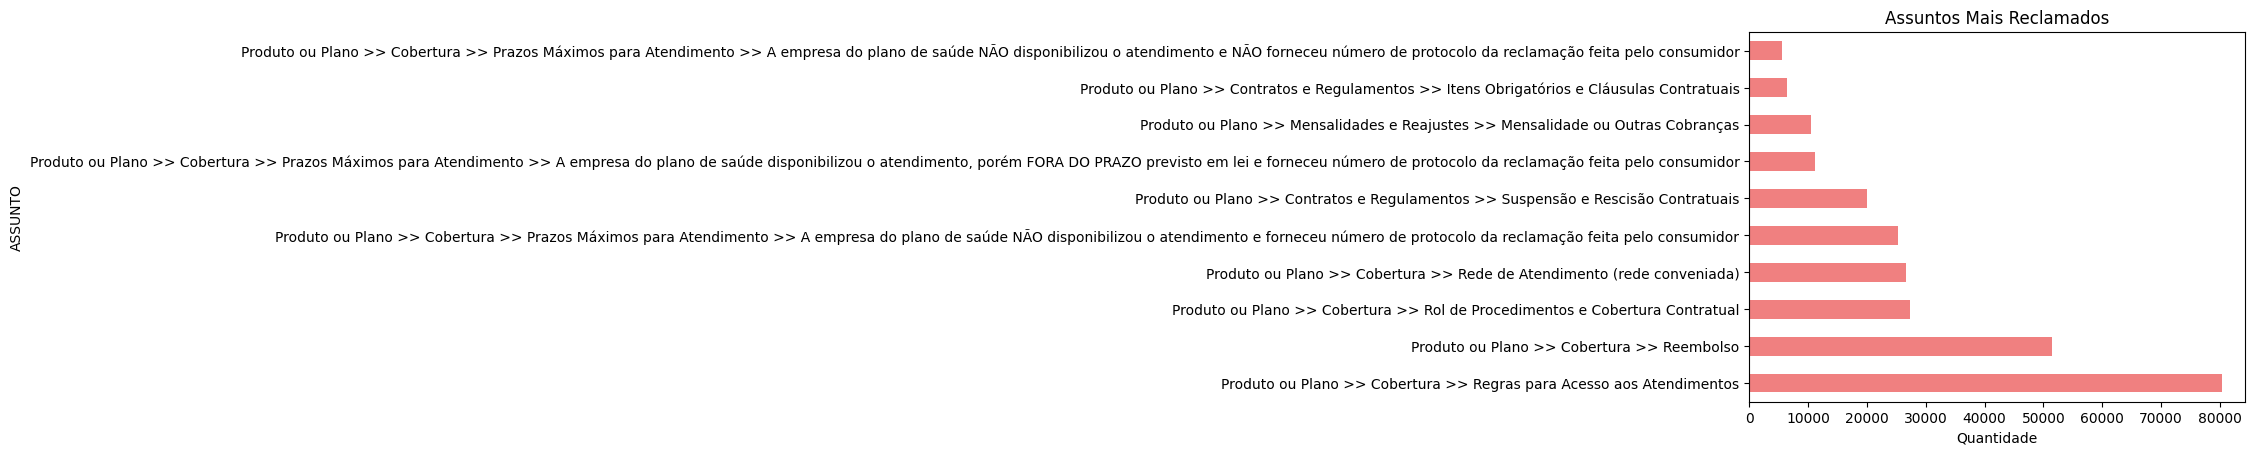

In [44]:

df['ASSUNTO'].value_counts().head(10).sort_values().plot(kind='barh', color='lightcoral')
plt.title('Assuntos Mais Reclamados')
plt.xlabel('Quantidade')
plt.gca().invert_yaxis()
plt.show()

O gráfico apresenta os 10 principais assuntos responsáveis pelo maior número de reclamações registradas pelos beneficiários em 2024. Os destaques são:

🥇 Regras para Acesso aos Atendimentos é o tema mais recorrente, com quase 80 mil reclamações, o que aponta para barreiras enfrentadas pelos usuários no momento da utilização do plano.

🥈 Reembolso também aparece com destaque, o que pode indicar dificuldades de reembolso ou valores contestados.

⚠️ Itens relacionados a rede de atendimento, rol de procedimentos e rescisão contratual reforçam problemas estruturais no serviço prestado.

Diversas reclamações referem-se a prazos legais de atendimento, seja pelo não cumprimento ou pelo atendimento fora do prazo.





<ipython-input-46-c8b66ef98f50>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=temas_macro.head(10), y='Tema Principal', x='Quantidade', palette='mako')


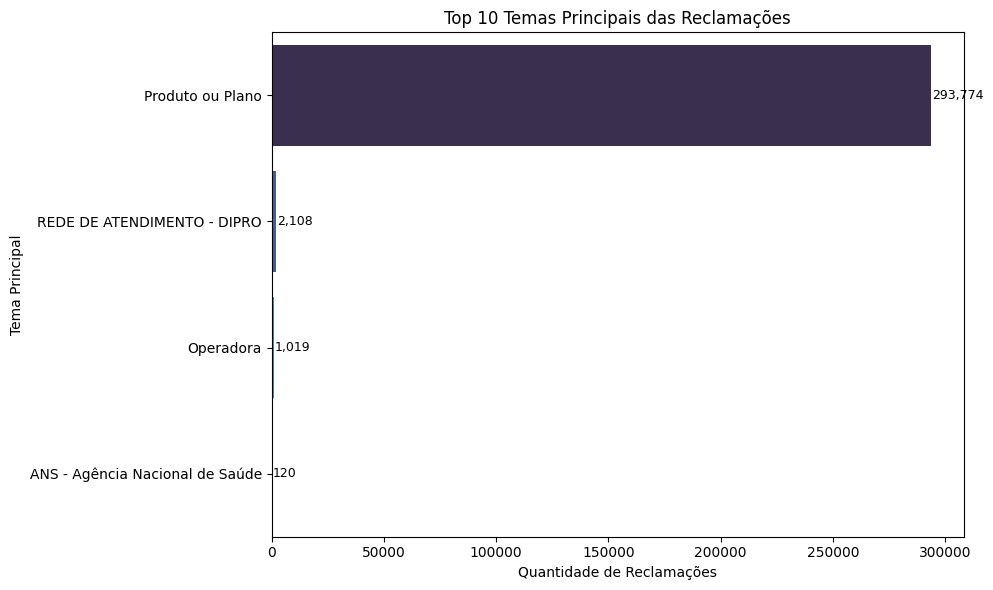

In [46]:
#  🔹 1. Agrupar por tema principal
df['TEMA_MACRO'] = df['ASSUNTO'].str.split('>>').str[0].str.strip()
temas_macro = df['TEMA_MACRO'].value_counts().reset_index()
temas_macro.columns = ['Tema Principal', 'Quantidade']

# 🔹 2. Criar o gráfico com os valores nas barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=temas_macro.head(10), y='Tema Principal', x='Quantidade', palette='mako')
plt.title('Top 10 Temas Principais das Reclamações')
plt.xlabel('Quantidade de Reclamações')
plt.ylabel('Tema Principal')

# 🔹 3. Inserir os valores dentro das barras
for i, valor in enumerate(temas_macro['Quantidade'].head(10)):
    ax.text(valor + 500, i, f'{valor:,}', va='center', fontsize=9)

plt.tight_layout()
plt.show()


Ao agrupar os assuntos por seus temas mais amplos, temos o seguinte ranking:

🥇 Tema Principal
Produto ou Plano	293.774
Rede de Atendimento - DIPRO	2.108
Operadora	1.019
ANS (Agência Reguladora)	120

# 3️⃣ Qual o perfil dos beneficiários que mais reclamam?

<ipython-input-49-3fa84397a2de>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=faixa_counts.index, y=faixa_counts.values, palette='coolwarm')


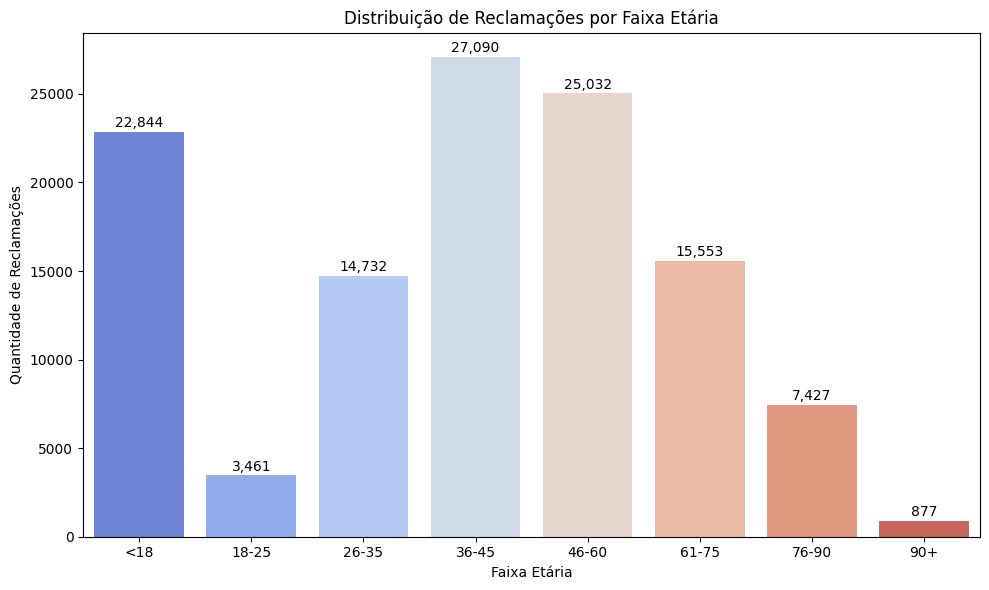

In [49]:
# Garantir que a data de nascimento seja um datetime
df['DT_NASC_BENEFICIARIO'] = pd.to_datetime(df['DT_NASC_BENEFICIARIO'], errors='coerce')

# Calcular idade
df['IDADE'] = pd.to_datetime('today').year - df['DT_NASC_BENEFICIARIO'].dt.year

# Criar faixa etária
bins = [0, 17, 25, 35, 45, 60, 75, 90, 150]
labels = ['<18', '18-25', '26-35', '36-45', '46-60', '61-75', '76-90', '90+']
df['FAIXA_ETARIA'] = pd.cut(df['IDADE'], bins=bins, labels=labels, right=False)

# Contar reclamações por faixa etária
faixa_counts = df['FAIXA_ETARIA'].value_counts().sort_index()

# Gráfico de barras com valores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=faixa_counts.index, y=faixa_counts.values, palette='coolwarm')
plt.title('Distribuição de Reclamações por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Reclamações')

# Inserir os valores nas barras
for i, valor in enumerate(faixa_counts.values):
    ax.text(i, valor + 100, f'{valor:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


O gráfico apresenta a quantidade de reclamações registradas por beneficiários, segmentadas por faixa etária. Alguns destaques importantes:

🥇 A faixa de 36 a 45 anos é a que mais registra reclamações (27.090), seguida de perto por 46 a 60 anos e menores de 18 anos.

🧒 A alta concentração de queixas na faixa <18 anos (22.844) pode refletir reclamações feitas pelos responsáveis por crianças e adolescentes — um possível indicativo de problemas em planos familiares.

👵 As faixas de 61 a 75 e 76 a 90 anos ainda apresentam volume relevante, indicando desafios para o público idoso.

🧓 A faixa 90+ registra um número muito menor de reclamações, o que pode estar relacionado à menor base populacional nesse grupo ou à dificuldade de acesso aos canais de denúncia.

🎯 Conclusão: A concentração nas faixas economicamente ativas e de usuários dependentes (crianças) mostra a importância de políticas específicas para esses grupos e reforça o papel dos pais/responsáveis nas demandas feitas em nome de menores.


# Reclamações por Faixa Etária e Sexo

<ipython-input-50-b76a87f1a922>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo = df_filtrado.groupby(['FAIXA_ETARIA', 'SEXO']).size().reset_index(name='Quantidade')


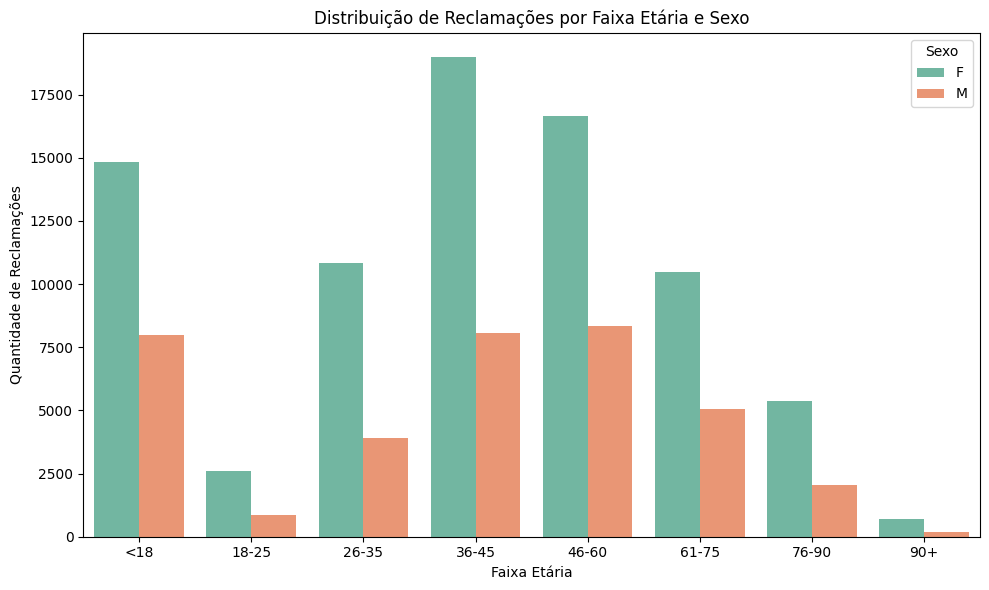

In [50]:


# 🔹 Garantir que os dados estejam prontos
df_filtrado = df[df['SEXO'].isin(['M', 'F'])]  # Considera apenas masculino e feminino

# 🔹 Agrupar por faixa etária e sexo
grupo = df_filtrado.groupby(['FAIXA_ETARIA', 'SEXO']).size().reset_index(name='Quantidade')

# 🔹 Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=grupo, x='FAIXA_ETARIA', y='Quantidade', hue='SEXO', palette='Set2')
plt.title('Distribuição de Reclamações por Faixa Etária e Sexo')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Reclamações')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()


O gráfico acima apresenta a quantidade de reclamações segmentadas por faixa etária e sexo dos beneficiários. As principais observações são:

👧 Mulheres (<18) apresentaram uma quantidade significativamente maior de reclamações em relação aos homens. Isso sugere que mães/responsáveis registram mais queixas por crianças e adolescentes do sexo feminino.

🧓 Mulheres entre 36 e 60 anos concentram o maior volume de reclamações entre todas as faixas, com destaque para as faixas 36-45 e 46-60, que são economicamente ativas e provavelmente as principais usuárias dos planos.

🧔 Em todas as faixas etárias, as mulheres registram mais reclamações do que os homens — o que pode refletir tanto maior insatisfação quanto maior engajamento com os canais de atendimento.

👵 A presença de reclamações acima de 75 anos, embora menor, ainda é relevante e evidencia que beneficiários mais idosos também enfrentam dificuldades com seus planos de saúde.

💡 Conclusão: A análise revela um perfil claro de maior reclamação por parte do público feminino em praticamente todas as faixas etárias, o que pode indicar uma percepção mais crítica ou maior participação ativa das mulheres na busca por solução de problemas com os planos de saúde.

# 4️⃣ Quais estados concentram mais reclamações?

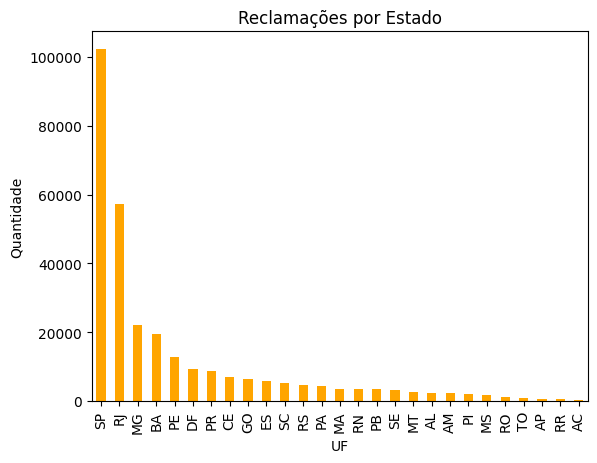

In [51]:
df['UF_BENEFICIARIO'].value_counts().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Reclamações por Estado')
plt.xlabel('UF')
plt.ylabel('Quantidade')
plt.show()

São Paulo (SP) concentra disparadamente o maior número de reclamações, ultrapassando 100 mil registros. Isso é consistente com o fato de o estado ter a maior população do país e também a maior concentração de operadoras de planos de saúde.

Rio de Janeiro (RJ) aparece em segundo lugar, seguido por Minas Gerais (MG), ambos também estados populosos e com ampla cobertura de planos.

Os estados do Norte e Centro-Oeste, como Roraima (RR), Acre (AC) e Amapá (AP), apresentam os menores volumes de reclamações, o que pode estar relacionado tanto ao menor número de beneficiários quanto à menor oferta de planos e serviços.


Importante considerar que o estado de São Paulo possui a maior população do Brasil, além de concentrar o maior número de operadoras e beneficiários de planos de saúde. Assim, é esperado que apresente também um maior volume de reclamações.

Ou seja, o número absoluto de queixas é alto, mas não necessariamente indica pior desempenho das operadoras no estado — pode refletir apenas o maior número de contratos ativos.

# 5️⃣ Há diferenças entre os meios de atendimento usados?

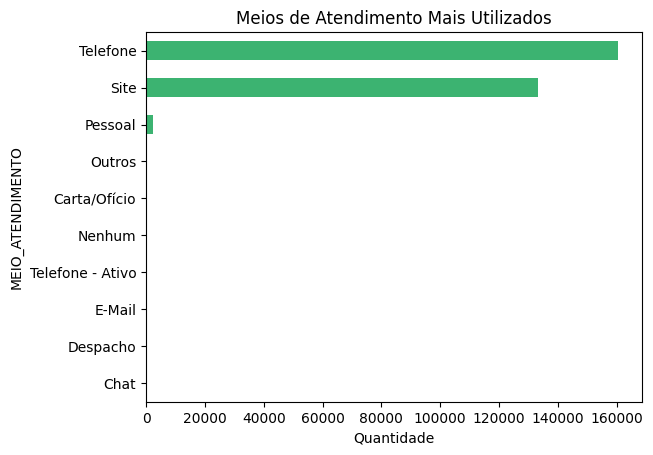

In [52]:
df['MEIO_ATENDIMENTO'].value_counts().head(10).sort_values().plot(kind='barh', color='mediumseagreen')
plt.title('Meios de Atendimento Mais Utilizados')
plt.xlabel('Quantidade')
plt.show()

Os canais mais utilizados pelos consumidores para registrar reclamações são:

📞 Telefone (aproximadamente 160 mil registros),

🌐 Site (cerca de 135 mil registros).

Estes dois meios somam a grande maioria das reclamações, o que pode indicar:

Acessibilidade: são canais mais práticos e amplamente disponíveis.

Digitalização do atendimento: o uso do site reforça a adesão crescente a meios digitais.

Baixa adesão ao atendimento presencial ou por carta, que somam números quase insignificantes frente aos demais.

Essa informação pode ser útil para operadoras ajustarem sua capacidade de atendimento nos canais mais demandados e para análise de efetividade do SAC.

# 7️⃣ Reclamações por época de contratação do plano

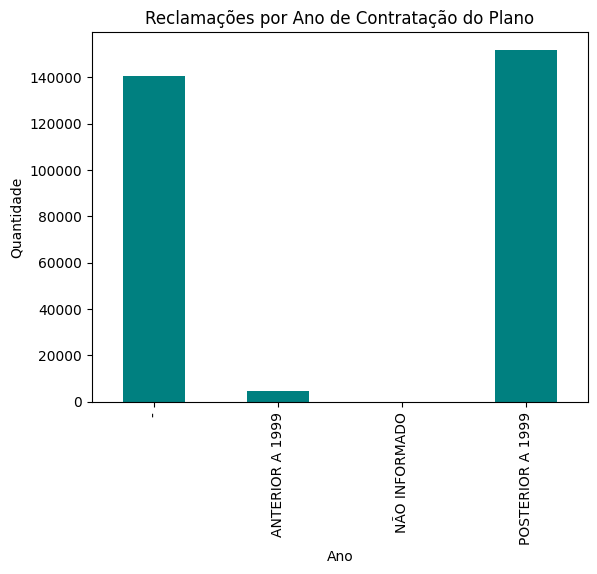

In [54]:
df['EPOCA_CONTRATACAO_PLANO'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Reclamações por Ano de Contratação do Plano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.show()

Reclamações por Época de Contratação do Plano

A maior parte das reclamações está concentrada em planos posteriores a 1999, o que era esperado, considerando que:

A Lei dos Planos de Saúde (Lei nº 9.656) passou a vigorar em 1999, regulamentando o setor e aumentando o número de contratos firmados.

Desde então, o mercado de planos cresceu significativamente, o que naturalmente resulta em mais demandas e reclamações.

Também há um número expressivo de reclamações para planos anteriores a 1999, o que pode indicar:

A categoria "Não informado" representa uma pequena parcela e pode sinalizar problemas de preenchimento ou qualidade dos dados.

# 8️⃣ Quantidade de reclamações × Taxa de finalização por operadora.

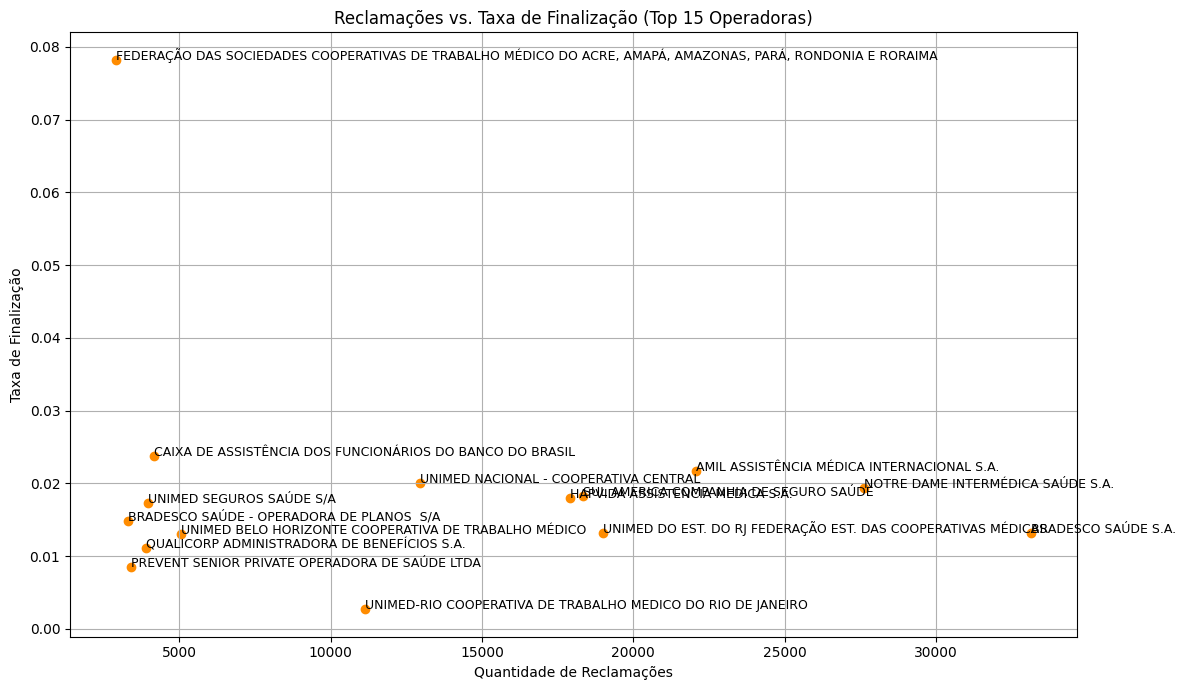

In [56]:
# 2. Filtrar apenas demandas finalizadas
df['FINALIZADA'] = df['STATUS_DEMANDA'].str.contains('Finalizada', case=False, na=False)

# 3. Agrupar por operadora
agrupado = df.groupby('NOME_OPERADORA').agg(
    Quantidade_Reclamacoes=('NUMERO_DEMANDA', 'count'),
    Reclamacoes_Finalizadas=('FINALIZADA', 'sum')
)

# 4. Calcular a taxa de finalização
agrupado['Taxa_Finalizacao'] = agrupado['Reclamacoes_Finalizadas'] / agrupado['Quantidade_Reclamacoes']

# 5. Selecionar as 15 operadoras com mais reclamações
top_operadoras = agrupado.sort_values(by='Quantidade_Reclamacoes', ascending=False).head(15)

# 6. Gráfico: Reclamações × Taxa de Finalização
plt.figure(figsize=(12, 7))
plt.scatter(top_operadoras['Quantidade_Reclamacoes'], top_operadoras['Taxa_Finalizacao'], color='darkorange')

# 7. Adicionar rótulos com nomes das operadoras
for i, row in top_operadoras.iterrows():
    plt.text(row['Quantidade_Reclamacoes'], row['Taxa_Finalizacao'], i, fontsize=9)

# 8. Ajustes visuais
plt.title('Reclamações vs. Taxa de Finalização (Top 15 Operadoras)')
plt.xlabel('Quantidade de Reclamações')
plt.ylabel('Taxa de Finalização')
plt.grid(True)
plt.tight_layout()
plt.show()

Operadoras no canto superior direito (alta quantidade + alta taxa de finalização) são as que mais recebem reclamações, mas resolvem bem.

Operadoras no canto inferior direito têm muitas reclamações e baixa resolução, sendo um alerta.

Canto inferior esquerdo indica operadoras menores, com menos reclamações, mas também menos resolução.



# 9️⃣ Qual a cobertura mais reclamada?

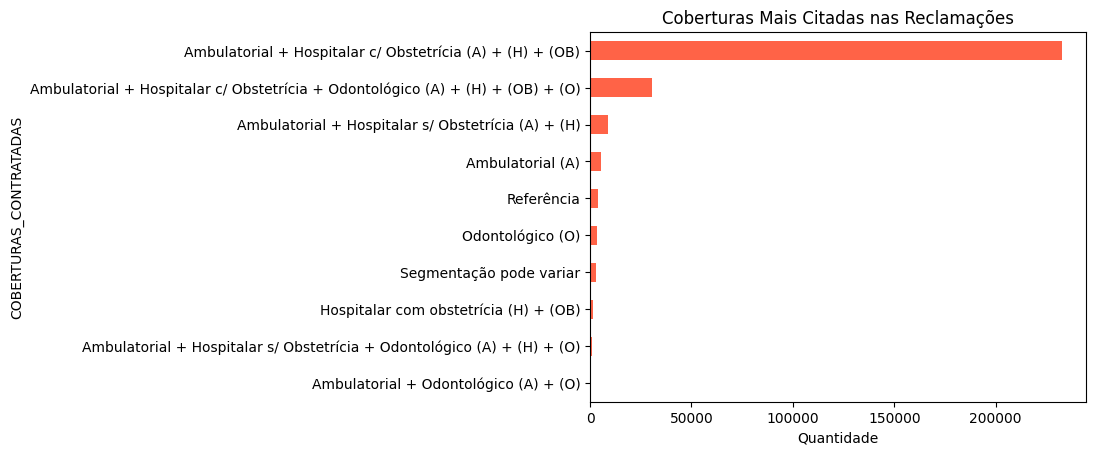

In [57]:
df['COBERTURAS_CONTRATADAS'].value_counts().head(10).plot(kind='barh', color='tomato')
plt.title('Coberturas Mais Citadas nas Reclamações')
plt.xlabel('Quantidade')
plt.gca().invert_yaxis()
plt.show()

Planos mais completos (com obstetrícia e hospitalar) têm maior incidência de reclamações, provavelmente por lidarem com situações mais críticas, urgentes ou complexas.

Pode indicar que a complexidade da cobertura gera mais atrito entre cliente e operadora.

Esse dado pode ser cruzado com taxa de finalização ou por operadora para verificar quais tipos de plano têm melhor ou pior desempenho.


# 🔟 Alguns procedimentos são mais reclamados?

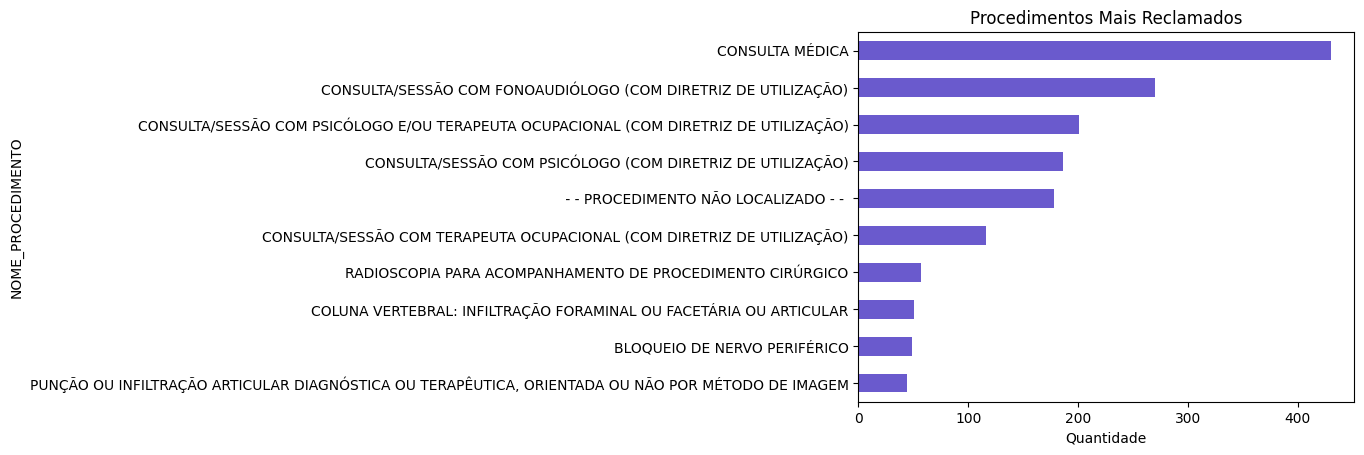

In [58]:
df['NOME_PROCEDIMENTO'].value_counts().head(10).plot(kind='barh', color='slateblue')
plt.title('Procedimentos Mais Reclamados')
plt.xlabel('Quantidade')
plt.gca().invert_yaxis()
plt.show()

Consulta médica lidera com folga entre os mais reclamados — o que é esperado, já que é o procedimento mais básico e utilizado.

Procedimentos terapêuticos com diretrizes específicas (fonoaudiologia, psicologia, terapia ocupacional) aparecem várias vezes — indicando possíveis dificuldades no acesso, autorização ou reembolso.

A presença de "- - PROCEDIMENTO NÃO LOCALIZADO - -" aponta para falhas no preenchimento ou no sistema de registro.

Procedimentos de maior complexidade, como infiltrações na coluna, também são alvo de queixas — isso pode indicar atrasos, negativa de cobertura ou limitações da rede.



✅ Conclusão do Projeto – Análise de Reclamações dos Beneficiários de Planos de Saúde (ANS 2024)
Este projeto teve como objetivo analisar a base pública de reclamações de beneficiários de planos de saúde disponibilizada pela ANS (Agência Nacional de Saúde Suplementar), a fim de identificar padrões, tendências e possíveis gargalos na prestação de serviços pelas operadoras.

📊 Principais Descobertas:
Volume de Reclamações: A maior concentração ocorreu nos meses de abril e julho, com uma queda expressiva em fevereiro, possivelmente por ser um mês mais curto e com menor atividade.

Operadoras com Mais Reclamações: Bradesco Saúde, NotreDame Intermédica e Amil lideram o volume de queixas — reflexo direto do seu grande número de beneficiários.

Assuntos Mais Reclamados: As reclamações se concentram em problemas de acesso a atendimentos, principalmente por regras de cobertura, rede credenciada e prazos para realização de procedimentos.

Estados com Mais Reclamações: São Paulo aparece disparado com maior volume de reclamações — o que é compatível com sua população e concentração de operadoras.

Coberturas Contratadas: Mais de 80% das reclamações envolvem planos do tipo Ambulatorial + Hospitalar com Obstetrícia, que são os mais comuns no mercado.

Perfil do Usuário: A maioria das queixas vem de beneficiários entre 36 e 60 anos, e do sexo feminino — o que pode refletir maior uso do plano e percepção crítica do serviço.

Taxa de Finalização: A proporção de reclamações realmente finalizadas ainda é baixa (cerca de 1,2%), o que pode indicar problemas na resolução efetiva das demandas.

Diferença entre Operadoras: Há, sim, diferença significativa na taxa de solução, com algumas operadoras solucionando até 100% das demandas, enquanto outras não apresentam nenhuma finalização registrada.

📌 Pontos de Melhoria Identificados:
Necessidade de mais transparência e eficiência no atendimento e na resolução de conflitos com beneficiários;

Padronização dos registros de atendimento e motivos de reclamação (existem muitos registros "não localizados" ou "não informados");

Investimento em canais digitais (chat e e-mail), ainda pouco utilizados, frente à alta demanda via telefone.

🛠️ Sobre a Abordagem Técnica:
Foi criado um catálogo de dados, com base no dicionário da ANS, estruturando as colunas, tipos e descrição dos campos.

O projeto seguiu a lógica de um Data Lake flat, com dados consolidados e análises exploratórias (EDA), além de análises estatísticas simples (como média, proporções e agrupamentos).

Os dados foram tratados e carregados via Google Colab, com reprodutibilidade garantida por links públicos e scripts comentados.

🧠 Reflexão Final:
A análise evidencia que, apesar dos avanços regulatórios, a experiência do cliente nos planos de saúde ainda apresenta muitos desafios, especialmente no que diz respeito à cobertura de procedimentos e agilidade nas respostas.

O uso de dados abertos como esse permite monitorar a qualidade do serviço das operadoras e empoderar o consumidor, além de fornecer insumos para decisões estratégicas por parte da ANS.

